In [1]:
! pip install -q kaggle

downlaod API key file "kaggle.json" from kaggle.com. login to your account and go to Account setting to dowmlaod this file, and upload in colab when prompted

In [3]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

Make new Directory for kaggle enviorment and copying the key so that we can use kaggle API to download data directly from kaggle

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
 ! chmod 600 ~/.kaggle/kaggle.json

download cat vs dog data to use as transfer learning experiment

In [7]:
! kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.1MB/s]
 98% 535M/543M [00:04<00:00, 135MB/s]
100% 543M/543M [00:05<00:00, 113MB/s]
 98% 265M/271M [00:02<00:00, 137MB/s]
100% 271M/271M [00:02<00:00, 95.7MB/s]


In [8]:
! mkdir train

In [9]:
! unzip -qq train.zip -d train

Set paths for train, test and validation directories

In [10]:
import os, shutil
original_dataset_dir = '/content/train/train'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

copy set of 4000 cat and dog images out of 25000 images we downloaded from kaggle, so that we experiment transfer learning on small dataset

In [11]:
original_dataset_dir = '/content/train/train'
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(train_cats_dir, fname)
 shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(validation_cats_dir, fname)
 shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(test_cats_dir, fname)
 shutil.copyfile(src, dst)

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(train_dogs_dir, fname)
 shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(validation_dogs_dir, fname)
 shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(test_dogs_dir, fname)
 shutil.copyfile(src, dst)

In [13]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [14]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [15]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [16]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [17]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [18]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [19]:
# ! unzip -qq test1.zip -d test

## **Importing VGG16 trained model from Keras**
now we import 

In [20]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [21]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# Adding Dense layer of top of Convolution Base
we will add Dense Layer on top of our convolution base , so as to train our Dense layer classifier with our new Image data

In [22]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


# Freezing the Weights of Convolution Layer, so that already learned weights of convolution layers are not changed due to backpropagation of weights learnt in dense layer

Freezing a layer or set of layers means preventing their weights from being
updated during training. If you don’t do this, then the representations that were previously
learned by the convolutional
base
will
be
modified
during
training.
Because
the
Dense
layers
on top are
randomly
initialized,
very large
weight
updates
would
be
propagated
through the network,
effectively
destroying
the
representations
previously
learned.


In [24]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


**Introduce Image Augmentation**


so that we can have variety of images for training data



In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [27]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [28]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

In [29]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
  history = model.fit(
  train_generator,
  steps_per_epoch=100,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=50)

Epoch 1/30
100/100 [==============================] - 49s 177ms/step - loss: 0.6467 - acc: 0.6213 - val_loss: 0.4543 - val_acc: 0.8170
Epoch 2/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4917 - acc: 0.7806 - val_loss: 0.3753 - val_acc: 0.8580
Epoch 3/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4513 - acc: 0.8116 - val_loss: 0.3333 - val_acc: 0.8700
Epoch 4/30
100/100 [==============================] - 18s 176ms/step - loss: 0.3981 - acc: 0.8266 - val_loss: 0.3090 - val_acc: 0.8850
Epoch 5/30
100/100 [==============================] - 18s 176ms/step - loss: 0.3875 - acc: 0.8300 - val_loss: 0.2928 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 18s 178ms/step - loss: 0.3575 - acc: 0.8525 - val_loss: 0.2839 - val_acc: 0.8900
Epoch 7/30
100/100 [==============================] - 18s 176ms/step - loss: 0.3602 - acc: 0.8459 - val_loss: 0.2731 - val_acc: 0.8980
Epoch 8/30
100/100 [==============================] - 1

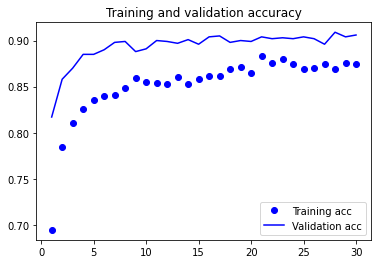

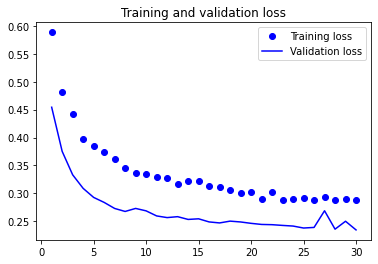

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# **Freezing Low level layers of convolution base and unfreeze high level layers**

In [32]:
#Freezing all layers up to a specific one and unfreezing specific layers

In [33]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
 if layer.name == 'block5_conv1':
  set_trainable = True
 if set_trainable:
  layer.trainable = True
 else:
  layer.trainable = False

In [34]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
  model.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(lr=1e-5),
  metrics=['acc'])
  history = model.fit(
  train_generator,
  steps_per_epoch=100,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=50)

Epoch 1/100
100/100 [==============================] - 19s 181ms/step - loss: 0.3054 - acc: 0.8749 - val_loss: 0.2296 - val_acc: 0.9150
Epoch 2/100
100/100 [==============================] - 18s 180ms/step - loss: 0.2555 - acc: 0.8981 - val_loss: 0.2639 - val_acc: 0.8920
Epoch 3/100
100/100 [==============================] - 18s 176ms/step - loss: 0.2414 - acc: 0.9053 - val_loss: 0.2192 - val_acc: 0.9190
Epoch 4/100
100/100 [==============================] - 18s 180ms/step - loss: 0.2213 - acc: 0.9086 - val_loss: 0.1969 - val_acc: 0.9250
Epoch 5/100
100/100 [==============================] - 18s 177ms/step - loss: 0.2010 - acc: 0.9193 - val_loss: 0.1954 - val_acc: 0.9300
Epoch 6/100
100/100 [==============================] - 18s 179ms/step - loss: 0.1960 - acc: 0.9206 - val_loss: 0.1828 - val_acc: 0.9390
Epoch 7/100
100/100 [==============================] - 18s 179ms/step - loss: 0.1873 - acc: 0.9261 - val_loss: 0.2206 - val_acc: 0.9250
Epoch 8/100
100/100 [===========================

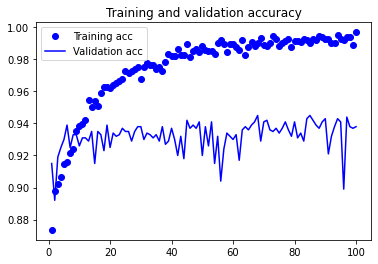

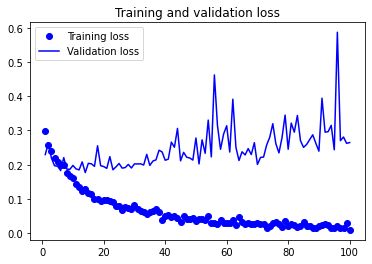

In [35]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

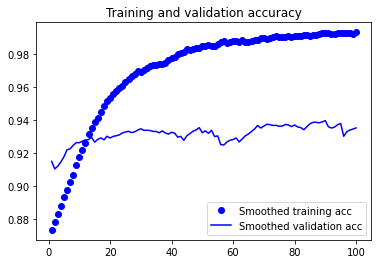

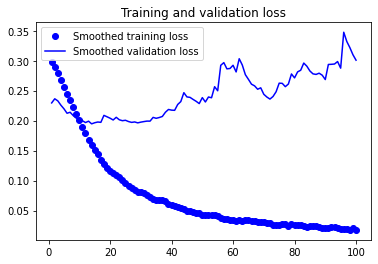

In [36]:
def smooth_curve(points, factor=0.8):
 smoothed_points = []
 for point in points:
  if smoothed_points:
   previous = smoothed_points[-1]
   smoothed_points.append(previous * factor + point * (1 - factor))
  else:
   smoothed_points.append(point)
 return smoothed_points
plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [37]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 3s 59ms/step - loss: 0.3292 - acc: 0.9410
test acc: 0.9409999847412109


# Inception **V3**

In [38]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [39]:

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
# local_weights_file = path_inception

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                )

# pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  
    layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()



87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________

In [40]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [41]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [42]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = x = layers.Dense(1024, activation='relu')(x) 
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                 
# Add a final sigmoid layer for classification
x = x = layers.Dense  (1, activation='sigmoid')(x)         

model = Model( pre_trained_model.input, x)  

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy']) 

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [43]:
# Add our data-augmentation parameters to ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=20,
      width_shift_range=0.3,
      height_shift_range=0.2,
      shear_range=0.5,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='reflect')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 97% accuracy

callbacks = myCallback()# Your Code Here
history = model.fit(train_generator,
      steps_per_epoch=50,  
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
                              validation_steps=25,
      callbacks=[callbacks])

Epoch 1/30
50/50 [==============================] - 12s 178ms/step - loss: 0.6256 - accuracy: 0.7547 - val_loss: 0.3255 - val_accuracy: 0.8760
Epoch 2/30
50/50 [==============================] - 8s 159ms/step - loss: 0.2896 - accuracy: 0.8894 - val_loss: 0.1243 - val_accuracy: 0.9600
Epoch 3/30
50/50 [==============================] - 8s 158ms/step - loss: 0.1840 - accuracy: 0.9349 - val_loss: 0.1164 - val_accuracy: 0.9640
Epoch 4/30
50/50 [==============================] - 8s 162ms/step - loss: 0.2278 - accuracy: 0.9229 - val_loss: 0.1525 - val_accuracy: 0.9400
Epoch 5/30
50/50 [==============================] - 8s 158ms/step - loss: 0.1975 - accuracy: 0.9259 - val_loss: 0.1064 - val_accuracy: 0.9680
Epoch 6/30
50/50 [==============================] - 8s 162ms/step - loss: 0.1887 - accuracy: 0.9343 - val_loss: 0.1525 - val_accuracy: 0.9520
Epoch 7/30
50/50 [==============================] - 8s 158ms/step - loss: 0.1433 - accuracy: 0.9440 - val_loss: 0.1802 - val_accuracy: 0.9520
Epoch

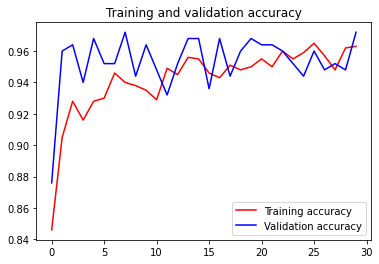

<Figure size 432x288 with 0 Axes>

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()